In [16]:
# keras modules
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print('shape of x_train' , x_train.shape)
print('shape of y_train' , y_train.shape)
print('shape of x_test' , x_test.shape)
print('shape of y_test' , y_test.shape)


shape of x_train (60000, 28, 28)
shape of y_train (60000,)
shape of x_test (10000, 28, 28)
shape of y_test (10000,)


## Show a data item

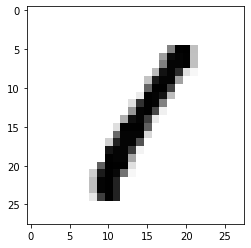

In [5]:
import matplotlib.pyplot as plt
digit=x_train[3]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Data preprocessing

In [6]:
# compute the number of labels
number_labels=len(np.unique(y_train))
number_labels

10

In [7]:
# convert y_train & y_test to one-hot vector
y_train_2=to_categorical(y_train)
y_test_2=to_categorical(y_test)

In [8]:
print('y_train before : ' ,y_train.shape )
print('y_train after : ' , y_train_2.shape)

y_train before :  (60000,)
y_train after :  (60000, 10)


## Adjust the dimensions to fit the network.

In [9]:
print('x_train.shape :' , x_train.shape)
image_size=x_train.shape[1]
print('image size : ', image_size)

x_train.shape : (60000, 28, 28)
image size :  28


### resizeing & normalization

In [10]:
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [11]:
print('x_train after :',x_train.shape)
print('x_test after :' , x_test.shape)

x_train after : (60000, 28, 28, 1)
x_test after : (10000, 28, 28, 1)


## network parameters

In [12]:
inputs_shape=(image_size,image_size ,1)
batch_size=128
kernel_size=3
pool_size=2
filters=64
dropout=0.2

## The Model

In [31]:
import keras
from keras import layers

In [32]:
model=Sequential([
                  layers.Conv2D(filters=filters,
                                kernel_size=kernel_size,
                                activation='relu',
                                input_shape=inputs_shape,name='layer_one'),
                  layers.MaxPooling2D(pool_size,name='layer_max_one'),
                  layers.Conv2D(filters=filters,
                                kernel_size=kernel_size,
                                activation='relu',name='layer_2'),
                  layers.MaxPooling2D(pool_size,name='layer_max_2'),
                  layers.Conv2D(filters=filters,
                                kernel_size=kernel_size,
                                activation='relu', name='layer_3'),
                  layers.Flatten(name='layer_4'),
                  layers.Dropout(dropout,name='layer_5'),
                  layers.Dense(number_labels,name='layer_6'),
                  layers.Activation('softmax',name='layer_7'),

])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_one (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 layer_max_one (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 layer_2 (Conv2D)            (None, 11, 11, 64)        36928     
                                                                 
 layer_max_2 (MaxPooling2D)  (None, 5, 5, 64)          0         
                                                                 
 layer_3 (Conv2D)            (None, 3, 3, 64)          36928     
                                                                 
 layer_4 (Flatten)           (None, 576)               0         
                                                      

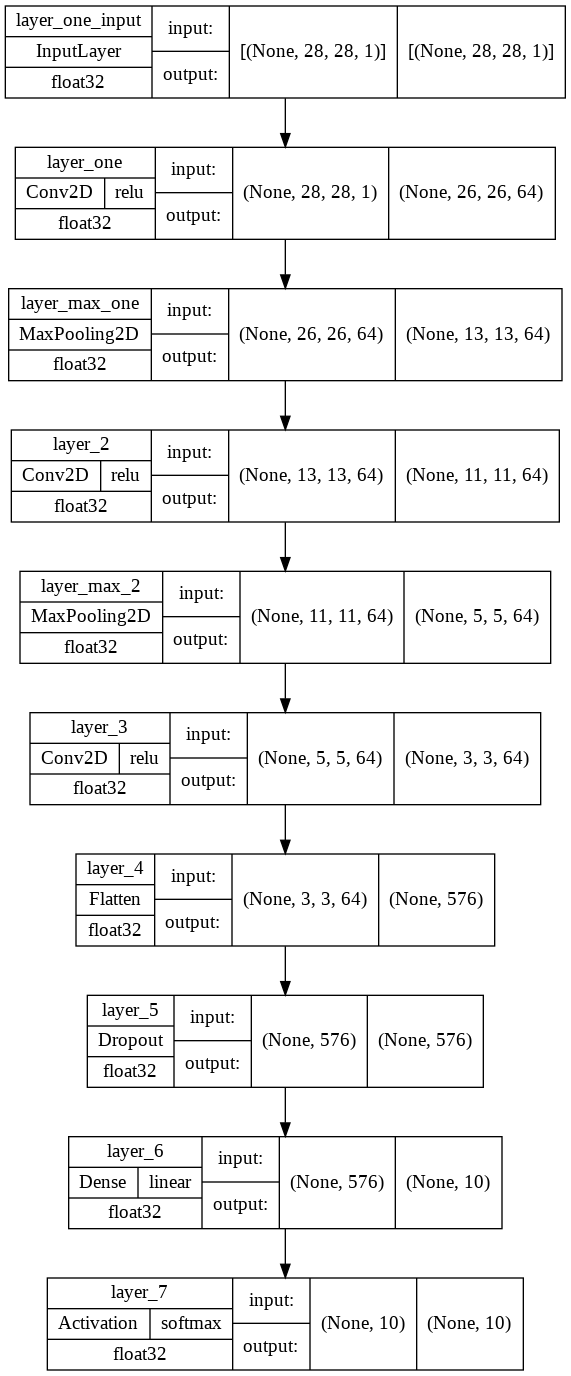

In [34]:
plot_model(model,to_file='model.png' ,show_shapes=True,show_dtype=True
           ,show_layer_activations=True)

In [35]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
# train the network
history=model.fit(x_train, y_train_2, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2571 - accuracy: 0.9251
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0631 - accuracy: 0.9805
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0460 - accuracy: 0.9856
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0365 - accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0262 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0232 - accuracy: 0.9922
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0195 - accuracy: 0.9933
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0174 - accuracy: 0.9945
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0158 - accura

In [37]:
_, acc = model.evaluate(x_test,
                        y_test_2,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 99.3%


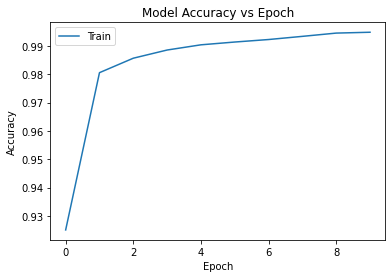

In [39]:
# Print the results on the chart
# Accurasy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

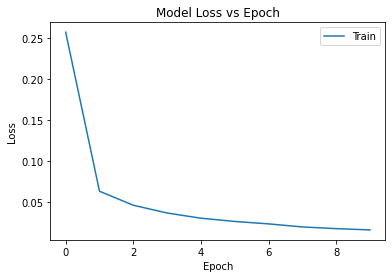

In [40]:
# tracing the path of loss
plt.plot(history.history['loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### I will stop now, and I will continue later using new methods.